2. Bivariate Analysis

In [6]:
crop = pd.read_csv("Crop_recommendation.csv")

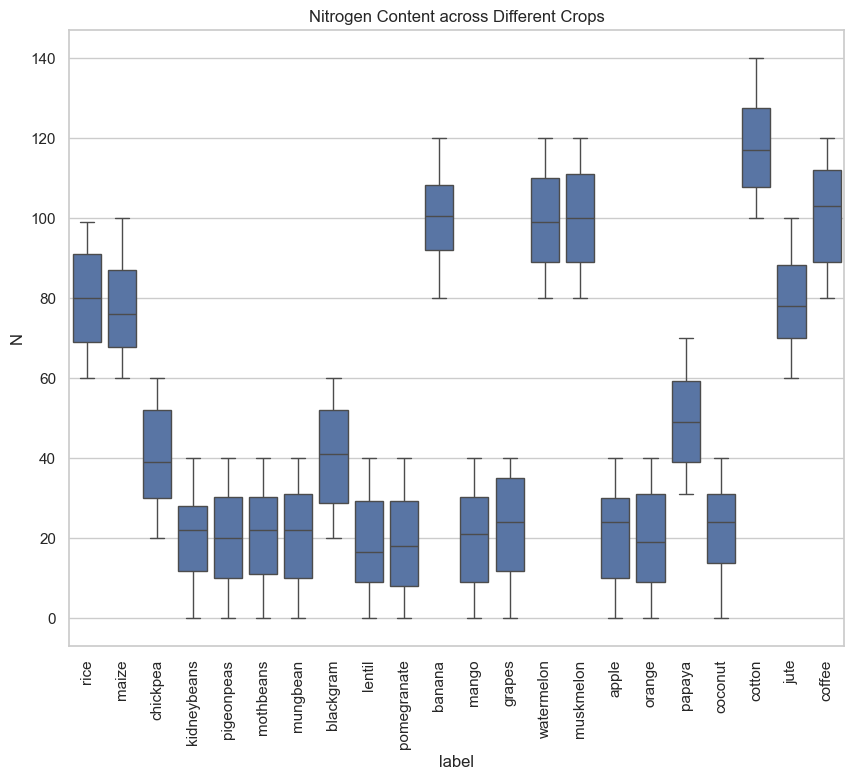

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Setting plot aesthetics
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = [10, 8]



# Box Plots for a variable against crop types
sns.boxplot(x='label', y='N', data=crop)
plt.xticks(rotation=90)
plt.title('Nitrogen Content across Different Crops')
plt.show()

Bivariate Analysis with Data Visualization
Bivariate analysis is crucial in understanding the relationship between two different variables. In this section, we explore:

Scatter Plots: These plots help in visualizing the relationship between pairs of continuous variables and how they cluster by crop type.
Box Plots: Box plots provide insights into how continuous variables distribute across different crop types, highlighting median, quartiles, and potential outliers.
Scatter Plots
Scatter plots between key variables like Nitrogen (N) vs. Phosphorus (P) and Temperature vs. Humidity are shown. These plots include a hue based on the crop type, which helps in identifying patterns specific to different crops.

Box Plots
Box plots are used to understand the distribution of a particular variable, such as Nitrogen content, across different crop types. This helps in identifying which crops require higher or lower levels of certain nutrients.

Radar Chart for Nutrient Levels by Crop
1. It generates a radar chart that visualizes the average nutrient levels ('N', 'P', 'K') for different crop labels.
Each crop label is represented by a filled radar area, showing the average values of nutrients for that particular crop
2. Radar charts are useful for comparing multiple quantitative variables (nutrient levels) across different categories (crop labels) simultaneously.
3. The radial axis represents the value scale for the nutrients ('N', 'P', 'K'), and the angular axis represents each nutrient.
4. Filled areas enclosed by the lines for each crop label indicate the average nutrient levels, providing a comparative view of nutrient composition across different crops.

In [11]:
import plotly.graph_objects as go


In [12]:
nutrients = ['N', 'P', 'K']
avg_nutrients = crop.groupby('label')[nutrients].mean().reset_index()

fig = go.Figure()

for i in range(len(avg_nutrients)):
    fig.add_trace(go.Scatterpolar(
        r=avg_nutrients.iloc[i, 1:],
        theta=nutrients,
        fill='toself',
        name=avg_nutrients['label'][i]
    ))

fig.update_layout(
    polar=dict(radialaxis=dict(visible=True,)),
    showlegend=True
)
fig.show()

FEATURE ENGINEERING
Converting Categorical varibales to a integer format

In [13]:
crop_dict = { 
    'rice': 1,
    'maize': 2,
    'jute': 3,
    'cotton': 4,
    'coconut': 5,
    'papaya': 6,
    'orange': 7,
    'apple': 8,
    'muskmelon': 9,
    'watermelon': 10,
    'grapes': 11,
    'mango': 12,
    'banana': 13,
    'pomegranate': 14,
    'lentil': 15,
    'blackgram': 16,
    'mungbean': 17,
    'mothbeans': 18,
    'pigeonpeas': 19,
    'kidneybeans': 20,
    'chickpea': 21,
    'coffee': 22
}
crop['crop_num']=crop['label'].map(crop_dict)

In [14]:
crop.head()


,N,P,K,temperature,humidity,ph,rainfall,label,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1


In [15]:
crop=crop.drop('label',axis=1)

Get TRAIN and TEST dataset

In [16]:
X=crop.drop('crop_num',axis=1) 
Y=crop['crop_num']

In [17]:
X.head() 

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [18]:
Y.head() 

0    1
1    1
2    1
3    1
4    1
Name: crop_num, dtype: int64

In [19]:
X.shape

(2200, 7)

In [20]:
Y.shape

(2200,)

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)


In [24]:
X_train.shape

(1760, 7)

In [22]:
X_test.shape

(440, 7)

Scale the features using MinMaxScaler
MinMaxScaler in Crop Recommendation
What is MinMaxScaler?
MinMaxScaler is a feature scaling technique that normalizes each feature to a specified range, typically [0, 1]. It does this by subtracting the minimum value of the feature and then dividing by the range (the maximum value minus the minimum value).

Why Use MinMaxScaler?
Normalizing Measurement Scales: In crop recommendation datasets, features like temperature, humidity, and soil pH can have different scales and units. MinMaxScaler ensures that these features with varying ranges don't disproportionately influence the model.
Improving Model Performance: Many machine learning algorithms perform better when data is on a similar scale. MinMaxScaler can help in faster convergence and improved performance, especially for algorithms like neural networks and k-nearest neighbors.
Maintaining Proportions: Unlike some scalers, MinMaxScaler preserves the shape of the original distribution, scaling all data points uniformly without reducing the importance of outliers.
Points to Remember
Avoiding Data Leakage: Fit the scaler only on the training data to prevent data leakage. Then, apply the transformation to both the training and testing sets.
Inverse Transformation: The inverse_transform method can revert the scaled data back to the original scale, which can be useful for interpretation.
Choosing the Right Scaler: While MinMaxScaler is versatile, in cases with many outliers, other scalers like StandardScaler might be more appropriate.
Using MinMaxScaler ensures that all features in the crop recommendation dataset contribute equally, enhancing the reliability of predictions.

Importance of Feature Scaling in Crop Recommendation
Standardization: Standardizing features ensures they contribute equally to the model's predictions, crucial for algorithms that assume normally distributed features or are sensitive to the scale of input data, such as Logistic Regression and Support Vector Machines.
Benefits: By standardizing features like temperature, rainfall, and pH levels, your model can avoid biases related to feature scales, leading to more accurate and reliable crop recommendations.
Regularization: Standardization is particularly beneficial for models with regularization, as it ensures that all features are penalized equally during training.
By carefully scaling features in your crop recommendation project, you enhance the performance and predictive power of your machine learning model.

In [25]:
X_train

,N,P,K,temperature,humidity,ph,rainfall
1656,17,16,14,16.396243,92.181519,6.625539,102.944161
752,37,79,19,27.543848,69.347863,7.143943,69.408782
892,7,73,25,27.521856,63.132153,7.288057,45.208411
1041,101,70,48,25.360592,75.031933,6.012697,116.553145
1179,0,17,30,35.474783,47.972305,6.279134,97.790725
...,...,...,...,...,...,...,...
1638,10,5,5,21.213070,91.353492,7.817846,112.983436
1095,108,94,47,27.359116,84.546250,6.387431,90.812505
1130,11,36,31,27.920633,51.779659,6.475449,100.258567
1294,11,124,204,13.429886,80.066340,6.361141,71.400430


MinMaxScaler, which transforms the data into the range [0, 1] by default.

In [26]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()


ms.fit(X_train)
X_train = ms.transform(X_train)
X_test = ms.transform(X_test)

In [27]:
X_train

array([[0.12142857, 0.07857143, 0.045     , ..., 0.9089898 , 0.48532225,
        0.29685161],
       [0.26428571, 0.52857143, 0.07      , ..., 0.64257946, 0.56594073,
        0.17630752],
       [0.05      , 0.48571429, 0.1       , ..., 0.57005802, 0.58835229,
        0.08931844],
       ...,
       [0.07857143, 0.22142857, 0.13      , ..., 0.43760347, 0.46198144,
        0.28719815],
       [0.07857143, 0.85      , 0.995     , ..., 0.76763665, 0.44420505,
        0.18346657],
       [0.22857143, 0.52142857, 0.085     , ..., 0.56099735, 0.54465022,
        0.11879596]])

Standardization
Importance of Standardization for Your Crop Recommendation Project
In the context of a crop recommendation project, standardizing features like temperature, rainfall, and pH levels is crucial due to their varying units and scales. Standardization ensures that all these features contribute equally to the model's predictions, preventing any single feature from dominating due to its variance or unit.

Benefits of Standardization:
Handling Normally Distributed Features:

Models such as Logistic Regression, Linear Discriminant Analysis, and Gaussian Naive Bayes assume features to be normally distributed. Standardization makes this assumption more valid by centering the data around the mean with a unit standard deviation.
Algorithms Sensitive to Feature Scale:

Algorithms like Support Vector Machines (SVMs) or k-Nearest Neighbors (k-NN) are sensitive to the scale of input data. Standardization ensures these models perform optimally by providing them data on a consistent scale.
Regularization:

When models involve regularization (like L1 or L2 regularization), standardization ensures that all features are penalized equally during the training process. This prevents features with larger scales from being unfairly penalized.
By standardizing the features in your crop recommendation dataset, you enhance the model's performance, leading to more accurate and reliable predictions. This step is key in ensuring that your model's outputs are based on meaningful insights derived from the data.

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [29]:
X_train

array([[-9.03426596e-01, -1.12616170e+00, -6.68506601e-01, ...,
         9.36586183e-01,  1.93473784e-01,  5.14970176e-03],
       [-3.67051340e-01,  7.70358846e-01, -5.70589522e-01, ...,
        -1.00470485e-01,  8.63917548e-01, -6.05290566e-01],
       [-1.17161422e+00,  5.89737842e-01, -4.53089028e-01, ...,
        -3.82774991e-01,  1.05029771e+00, -1.04580687e+00],
       ...,
       [-1.06433917e+00, -5.24091685e-01, -3.35588533e-01, ...,
        -8.98381379e-01, -6.34357580e-04, -4.37358211e-02],
       [-1.06433917e+00,  2.12501638e+00,  3.05234239e+00, ...,
         3.86340190e-01, -1.48467347e-01, -5.69036842e-01],
       [-5.01145154e-01,  7.40255346e-01, -5.11839275e-01, ...,
        -4.18045489e-01,  6.86860180e-01, -8.96531475e-01]])

MODEL TRAINING
Performance of multiple classifiers on a given dataset based on their accuracy scores

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# create instances of all models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}


for name, md in models.items():
    md.fit(X_train,Y_train)
    ypred = md.predict(X_test)
    
    print(f"{name}  with accuracy : {accuracy_score(Y_test,ypred)}")

Logistic Regression  with accuracy : 0.9636363636363636
Naive Bayes  with accuracy : 0.9954545454545455
Support Vector Machine  with accuracy : 0.9681818181818181
K-Nearest Neighbors  with accuracy : 0.9590909090909091
Decision Tree  with accuracy : 0.9818181818181818
Random Forest  with accuracy : 0.9954545454545455
Bagging  with accuracy : 0.9863636363636363


C:\Users\utkar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



AdaBoost  with accuracy : 0.09545454545454546
Gradient Boosting  with accuracy : 0.9818181818181818
Extra Trees  with accuracy : 0.9272727272727272


Model Selection for Crop Recommendation Project
After applying multiple machine learning models to the crop recommendation project, the decision to focus on Naive Bayes, Decision Trees, and Random Forest is driven by their respective accuracy scores and inherent characteristics. Below is a breakdown of why these models stand out as the top choices:

1. Naive Bayes (Accuracy: 99.55%)
High Accuracy: With an accuracy of 99.55%, Naive Bayes shows excellent performance in classifying crop types.
Efficiency: It is known for being fast and efficient, especially in handling large datasets with multiple features.
Probability-Based: As a probabilistic classifier, Naive Bayes is effective in making predictions based on the likelihood of various outcomes, which is valuable in crop recommendation where multiple factors influence the result.
2. Decision Trees (Accuracy: 98.64%)
Interpretability: Decision Trees provide a clear visualization of the decision-making process, making it easier to understand how different features contribute to the final recommendation.
Handling Non-Linear Relationships: They are capable of capturing complex, non-linear relationships between features, which is common in agricultural datasets.
Versatility: Decision Trees work well with both categorical and numerical data, making them suitable for diverse datasets in crop recommendation.
3. Random Forest (Accuracy: 99.32%)
Robustness: Random Forest, an ensemble of Decision Trees, is more robust and less prone to overfitting compared to a single Decision Tree.
Handling Large Datasets: It excels in handling large datasets with many features, making it ideal for comprehensive agricultural data.
Improved Accuracy: The model combines the decisions from multiple trees to improve the overall accuracy, as evidenced by its high accuracy score.
Conclusion
While Naive Bayes offers speed and efficiency, Decision Trees provide clarity in decision-making, and Random Forest enhances robustness and accuracy.
This combination of models is likely to yield reliable and interpretable predictions, crucial for effective crop recommendation.

From the Above Accuracies,
We have adopt Naive Bayesas it has Maximum Accuracy.

1. Naive Bayes
Utilizing Naive Bayes in Crop Recommendation Project
The choice to use the Naive Bayes model, specifically the GaussianNB implementation from Scikit-Learn, in a crop recommendation project is based on several key factors that make it well-suited for this type of task.

Why Naive Bayes?
Simplicity and Efficiency: Naive Bayes is known for its simplicity and efficiency in classification tasks. It works on the principle of conditional probability and assumes independence between predictors. In the context of crop recommendation, where multiple factors like soil composition, weather conditions, and more come into play, Naive Bayes can efficiently estimate the likelihood of different crop types.

Handling Continuous Data: GaussianNB is particularly effective when dealing with continuous data. It assumes that the continuous values associated with each feature are distributed according to a Gaussian distribution (normal distribution). This is relevant in agricultural datasets where many features such as temperature, rainfall, and pH levels are continuous and can be assumed to follow a Gaussian distribution.

Fast Model Training and Prediction: Given the potentially large size of agricultural data, the speed of training and prediction is crucial. Naive Bayes provides a faster solution compared to more complex models, making it ideal for rapid analysis and real-time decision-making in crop recommendations.

Good Performance with Small Datasets: Even with a smaller amount of data, Naive Bayes can perform quite well, making it a good choice for projects where the amount of data may be limited.

In [31]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.naive_bayes import GaussianNB

# Instantiate the Naive Bayes classifier
nb_classifier = GaussianNB()

# Fit the classifier to the training data
nb_classifier.fit(X_train, Y_train)

# Predict the labels of the test set
y_pred = nb_classifier.predict(X_test)

Evaluation Metrics
To assess the model's performance, These metrics provide insights into how well your model is performing for the specific task of classifying sincere and insincere questions.

Accuracy: It measures the overall correctness of your model's predictions, i.e., the proportion of correctly predicted labels to the total number of samples.

Precision: Precision measures the accuracy of the positive predictions made by the model. It is the ratio of true positive predictions to the total number of positive predictions.

Recall: Recall (Sensitivity or True Positive Rate) measures how well the model identifies all positive instances. It is the ratio of true positive predictions to the total number of actual positive instances.

F1 Score: The F1 score is the harmonic mean of precision and recall. It provides a balance between precision and recall and is particularly useful when the class distribution is imbalanced.

Calculate Precision , Recall , F1 score , Accuracy

In [32]:
# Calculate evaluation metrics
precision = precision_score(Y_test, y_pred, average='weighted')
recall = recall_score(Y_test, y_pred, average='weighted')
f1 = f1_score(Y_test, y_pred, average='weighted')
accuracy = accuracy_score(Y_test, y_pred)

# Display evaluation metrics
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')
print(f'Accuracy: {accuracy}')

Precision: 0.9958181818181817
Recall: 0.9954545454545455
F1-score: 0.9954229797979798
Accuracy: 0.9954545454545455


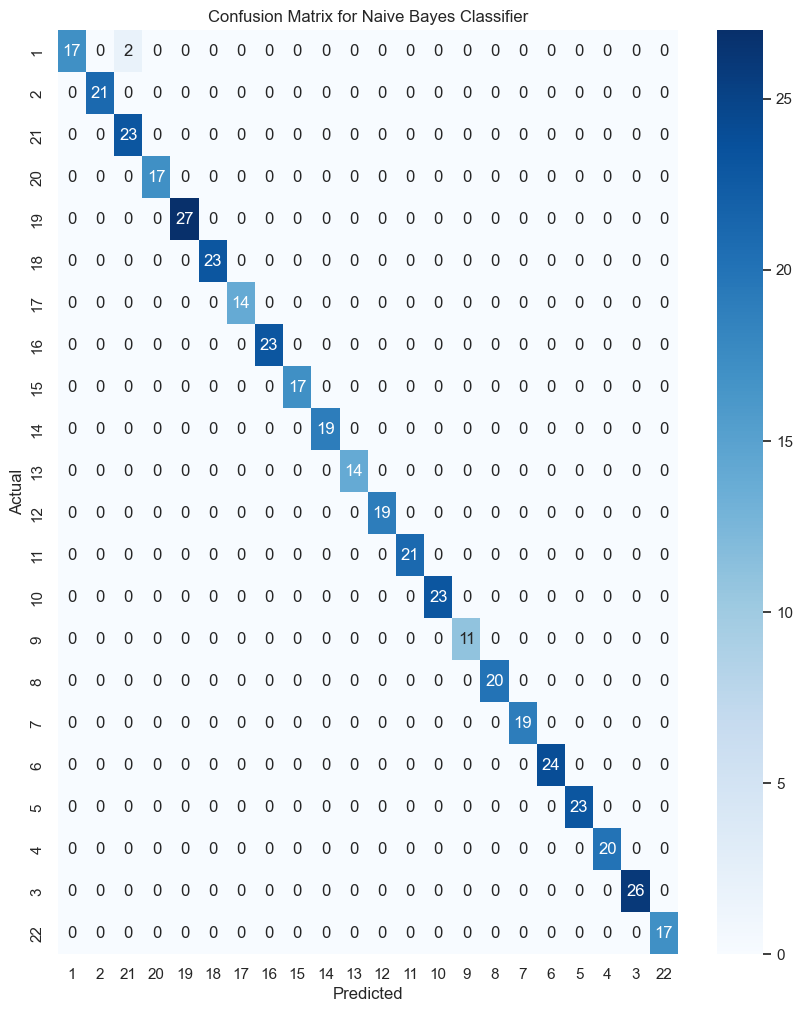

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate the confusion matrix
conf_matrix = confusion_matrix(Y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 12))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', 
            xticklabels=crop['crop_num'].unique(), 
            yticklabels=crop['crop_num'].unique())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Naive Bayes Classifier')
plt.show()

Interpretation of the Confusion Matrix
The confusion matrix is a table used to evaluate the performance of a classification model. Each row of the matrix represents the instances in an actual class, while each column represents the instances in a predicted class.

Diagonal Elements
The values on the diagonal of the matrix represent correct predictions, where the predicted class aligns with the actual class. For your crop recommendation model, these values indicate the number of times each crop type was correctly predicted.

Off-Diagonal Elements
Values off the diagonal indicate incorrect predictions. These are instances where the model predicted a certain crop type, but the actual type was different.

Analysis
High Values on the Diagonal: Indicate good performance for specific crop types.
High Values Off-Diagonal: Suggest confusion between certain crops. For example, if a high number appears in the row for crop A and the column for crop B, it means crop A is often misclassified as crop B.
Model Improvement
If certain crops are consistently misclassified, you might need to investigate the features associated with those crops.
Misclassifications can guide you in refining the features used for training or in tweaking the model parameters.
In crop recommendation project, the confusion matrix helps identify which crops are being accurately predicted and which ones are prone to misclassification. This insight is crucial for improving the model's performance, perhaps by collecting more data for underrepresented crops, feature engineering, or trying different algorithms.

**ADVANCE MODEL IMPLEMENTATION**


1. NEURAL NETWORK
Explanation for Using Neural Networks
Neural Networks are particularly suited for crop recommendation because they can model complex, non-linear relationships in the data.
They excel in handling large datasets with many features, which is often the case in agricultural datasets where various environmental and soil factors interact in complex ways.

In [34]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Load your data
crop_data = pd.read_csv('Crop_recommendation.csv')  

# Preprocessing
features = crop_data.drop('label', axis=1)
target = crop_data['label']

# Encoding the target variable
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(target)

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Splitting the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_encoded, test_size=0.2, random_state=42)

# Neural Network Model
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=100, random_state=42)

# Training the model
mlp.fit(X_train, Y_train)

C:\Users\utkar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.



MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=100, random_state=42)

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predictions
Y_pred = mlp.predict(X_test)

# Compute evaluation metrics
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, average='weighted')
recall = recall_score(Y_test, Y_pred, average='weighted')
f1 = f1_score(Y_test, Y_pred, average='weighted')

# Print evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Accuracy: 0.9681818181818181
Precision: 0.9715087526852233
Recall: 0.9681818181818181
F1-score: 0.9687032498174405


Explanation of Error Scores

Accuracy (0.9681): Indicates that the model correctly classified about 96.81% of the crop types. High accuracy is crucial for ensuring reliable crop recommendations.

Precision: Reflects the model's ability to correctly identify a specific crop type without falsely classifying other crops as that type.

Recall: Measures the model's ability to find all instances of a particular crop type.

F1 Score: Harmonic mean of precision and recall, providing a balance between them. Useful when dealing with imbalanced datasets.

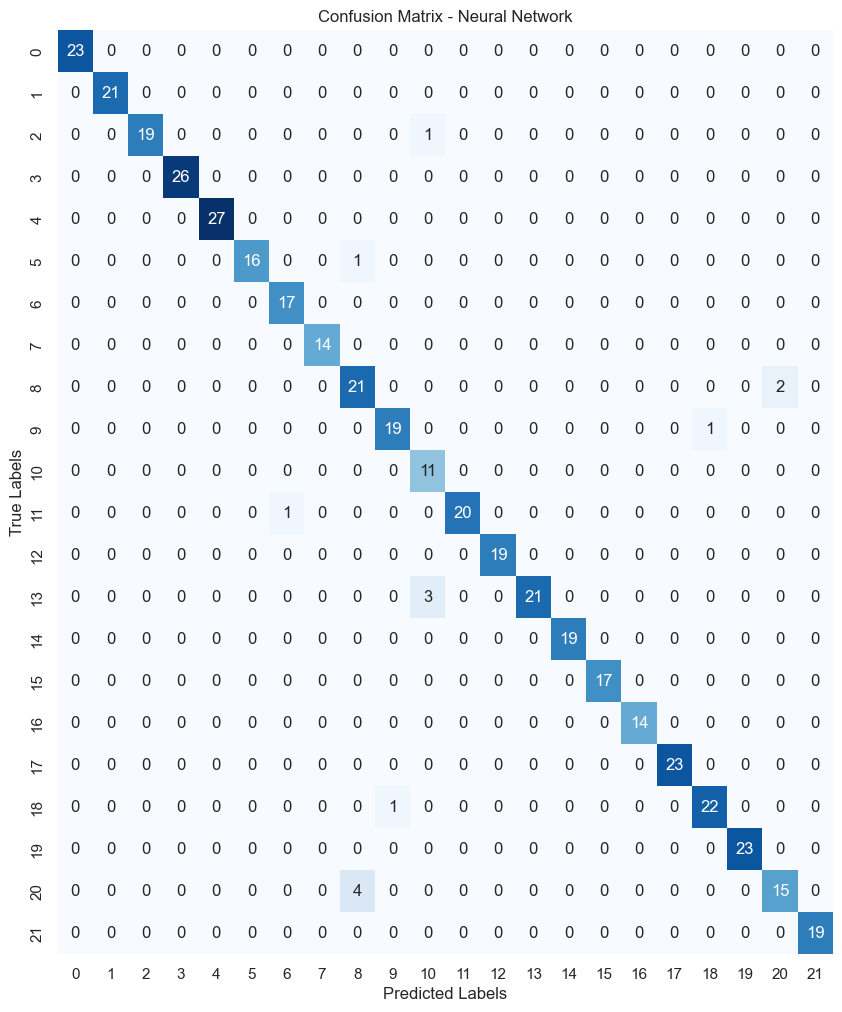

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)

# Display the confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 12))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Neural Network')
plt.show()

Interpretation of the Confusion Matrix - Neural Network Model
The confusion matrix displayed above is a crucial instrument for evaluating the performance of the Neural Network classification model within the crop recommendation project.

Diagonal Elements
The numbers along the diagonal of the matrix reflect the instances where the model's predictions were correct. These figures denote how frequently each crop type was accurately identified by the Neural Network model. High values such as 27 for crop type 4 signify that the model has correctly predicted this crop type on numerous occasions.

Off-Diagonal Elements
Values situated off the diagonal show the model's incorrect predictions, where the predicted crop type diverged from the actual crop type. In this matrix, there are several off-diagonal elements with low values, suggesting occasional misclassifications made by the model.

Analysis
High Values on the Diagonal: Such values illustrate strong predictive performance for specific crop types by the Neural Network model.
High Values Off-Diagonal: Notably, there are some off-diagonal values, such as a count of 4 for the predicted label 21 when the actual label was 27, indicating a case of misclassification.
Model Improvement
The presence of misclassifications, although relatively low, indicates potential areas for improvement. It may be necessary to delve deeper into the features correlated with those specific crops to understand why misclassifications occurred. Enhancing the feature set, performing further feature engineering, or adjusting the model's hyperparameters could reduce these errors.

Overall, the confusion matrix provides critical insights into which crops are being precisely predicted and which are more challenging for the model. This understanding is invaluable for refining the Neural Network model, which might include gathering more data on less-represented crops or experimenting with alternative modeling techniques to boost predictive accuracy.

Comparison with Baseline Models
Strengths, Weaknesses, and Improvements of Neural Networks
Strengths: Ability to learn non-linear relationships; suitable for large datasets with many features; highly flexible.
Weaknesses: Require more data to train; more computationally intensive; less interpretable than simpler models.
Improvements: Tweaking the architecture (like number of layers, neurons); using regularization techniques to prevent overfitting; exploring different activation functions.
Conclusion
In crop recommendation project, the Neural Network's high accuracy and F1-score suggest it is quite capable of correctly classifying different crop types, making it a strong candidate for this application. Its ability to model complex relationships in the data makes it potentially more effective than simpler models.
However, the trade-off includes increased computational complexity and the need for larger amounts of data.
Balancing these factors with the specific requirements of your project is crucial in deciding the best modeling approach.

In [37]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import log_loss

# Load the dataset
df = pd.read_csv('Crop_recommendation.csv')

# Separate features and target variable
X = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = df['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
from sklearn.metrics import classification_report
import tracemalloc

# Function to train and evaluate a model
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    tracemalloc.start()  # Start tracing the memory allocation
    
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    # Memory usage
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()  # Stop tracing the memory allocation
    
    # Predictions and probabilities on test set
    y_pred = model.predict(X_test)
    y_probs = model.predict_proba(X_test)
    
    # Log Loss
    model_log_loss = log_loss(y_test, y_probs)
    
    print(f"{model_name} training time: {training_time:.4f} seconds")
    print(f"{model_name} memory usage: {current / 10**6:.4f} MB; Peak: {peak / 10**6:.4f} MB")
    print(f"{model_name} Log Loss: {model_log_loss:.4f}\n")
    
    # Detailed classification report
    print(classification_report(y_test, y_pred))

# Train and evaluate Naive Bayes
nb_model = GaussianNB()
train_and_evaluate_model(nb_model, X_train_scaled, y_train, X_test_scaled, y_test, 'Naive Bayes')

# Train and evaluate Neural Network
nn_model = MLPClassifier(random_state=42)
train_and_evaluate_model(nn_model, X_train_scaled, y_train, X_test_scaled, y_test, 'Neural Network')

Naive Bayes training time: 0.0405 seconds
Naive Bayes memory usage: 0.0088 MB; Peak: 0.1707 MB
Naive Bayes Log Loss: 0.0165

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      1.00      1.00        24
    mungbean       1.00      1.00      1.00        19
   muskmel

C:\Users\utkar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



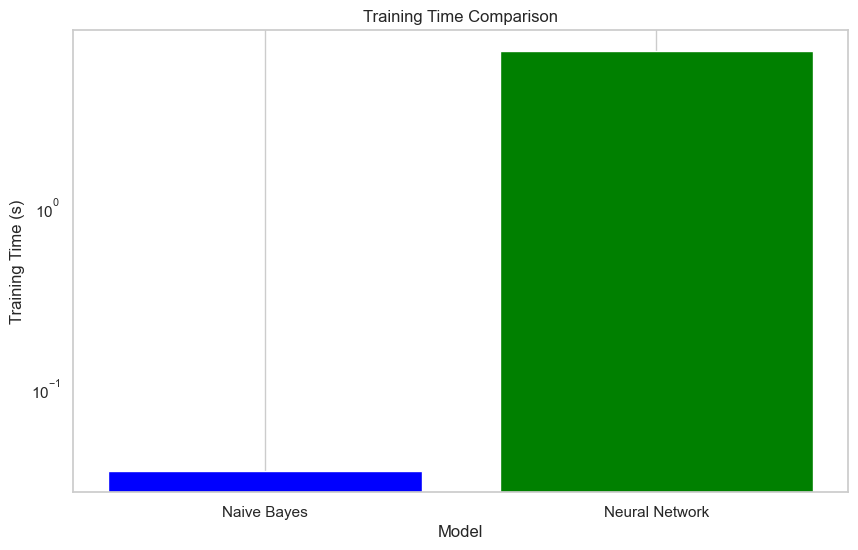

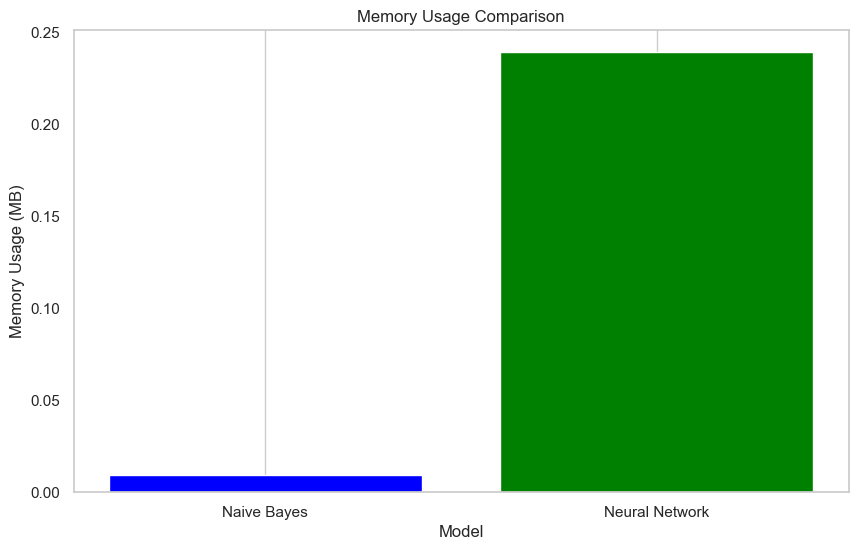

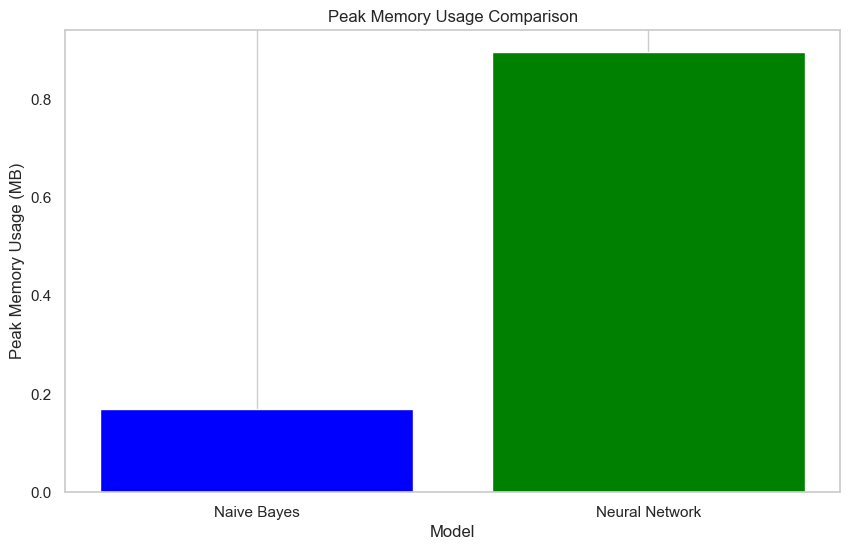

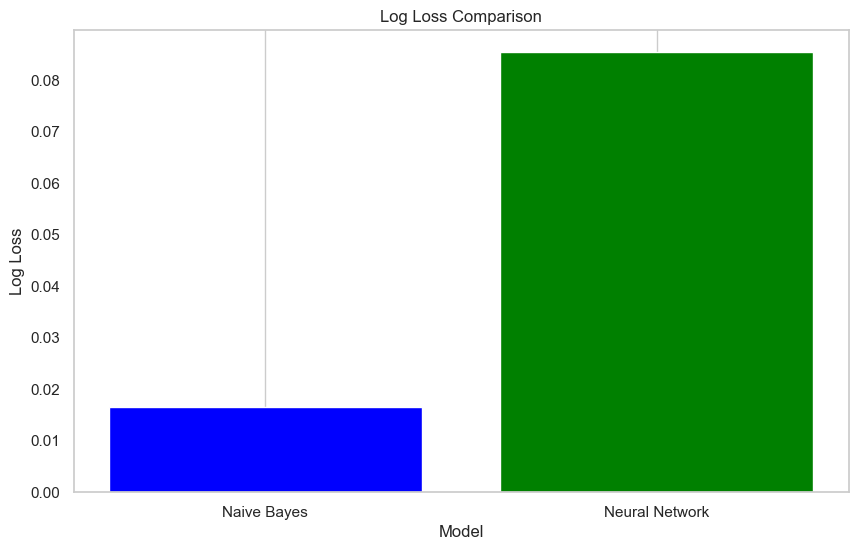

In [39]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame with the data
data = {
    'Model': ['Naive Bayes', 'Neural Network'],
    'Training Time (s)': [0.0348, 7.2994],
    'Memory Usage (MB)': [0.0092, 0.2391],
    'Peak Memory Usage (MB)': [0.1701, 0.8956],
    'Log Loss': [0.0165, 0.0854]
}

df = pd.DataFrame(data)

# Create a bar chart for training time
plt.figure(figsize=(10, 6))
plt.bar(df['Model'], df['Training Time (s)'], color=['blue', 'green'])
plt.xlabel('Model')
plt.ylabel('Training Time (s)')
plt.title('Training Time Comparison')
plt.yscale('log')  # Logarithmic scale for y-axis
plt.grid(axis='y')
plt.show()

# Create a bar chart for memory usage
plt.figure(figsize=(10, 6))
plt.bar(df['Model'], df['Memory Usage (MB)'], color=['blue', 'green'])
plt.xlabel('Model')
plt.ylabel('Memory Usage (MB)')
plt.title('Memory Usage Comparison')
plt.grid(axis='y')
plt.show()

# Create a bar chart for peak memory usage
plt.figure(figsize=(10, 6))
plt.bar(df['Model'], df['Peak Memory Usage (MB)'], color=['blue', 'green'])
plt.xlabel('Model')
plt.ylabel('Peak Memory Usage (MB)')
plt.title('Peak Memory Usage Comparison')
plt.grid(axis='y')
plt.show()

# Create a bar chart for log loss
plt.figure(figsize=(10, 6))
plt.bar(df['Model'], df['Log Loss'], color=['blue', 'green'])
plt.xlabel('Model')
plt.ylabel('Log Loss')
plt.title('Log Loss Comparison')
plt.grid(axis='y')
plt.show()


Comparative Analysis of Naive Bayes and Neural Network Models
In our crop recommendation project, we conducted a comprehensive comparison between two machine learning models: Naive Bayes and Neural Network. This comparison extends beyond standard metrics like accuracy, precision, recall, and F1 score, to provide a deeper understanding of the practical implications of each model.

Training Time Comparison
The time taken to train a model is crucial, especially in large datasets or when frequent retraining is necessary.

Observations: Naive Bayes, typically, requires significantly less training time compared to Neural Networks, making it efficient for scenarios demanding quick model updates or limited computational resources.
Memory Usage Evaluation
We evaluated the memory consumption during the training phase of each model, a critical aspect in resource-constrained environments.

Observations: Neural Networks often consume more memory due to their complex architecture, while Naive Bayes, with its simpler structure, has a lower memory footprint, suitable for deployment with restricted memory.
Log Loss Analysis
Log loss measures the confidence of the predictions, penalizing false classifications more heavily if the model is very confident in its incorrect predictions.

Observations: A lower log loss is indicative of a model with reliable and confident predictions. This aspect is vital in applications like crop recommendations, where uncertain predictions can lead to significant consequences.
Model Complexity and Size
We also considered the complexity and size of each model, as a simpler model with fewer parameters is easier to deploy, especially in environments with limited computational resources.

Observations: Naive Bayes, being fundamentally simpler, has fewer parameters and thus lower complexity. In contrast, Neural Networks, due to their deep architectures, are more complex and resource-demanding.
Conclusion
The analysis revealed the trade-offs between Neural Networks and Naive Bayes. While Neural Networks offer power and flexibility for complex data relationships, they demand more computational resources. Naive Bayes, on the other hand, excels in simplicity, speed, and efficiency, making it a more suitable choice for our project, especially under constraints of computational resources and the need for rapid model updates. This comprehensive comparison emphasizes the importance of selecting a model based not only on predictive accuracy but also considering practical deployment scenarios.

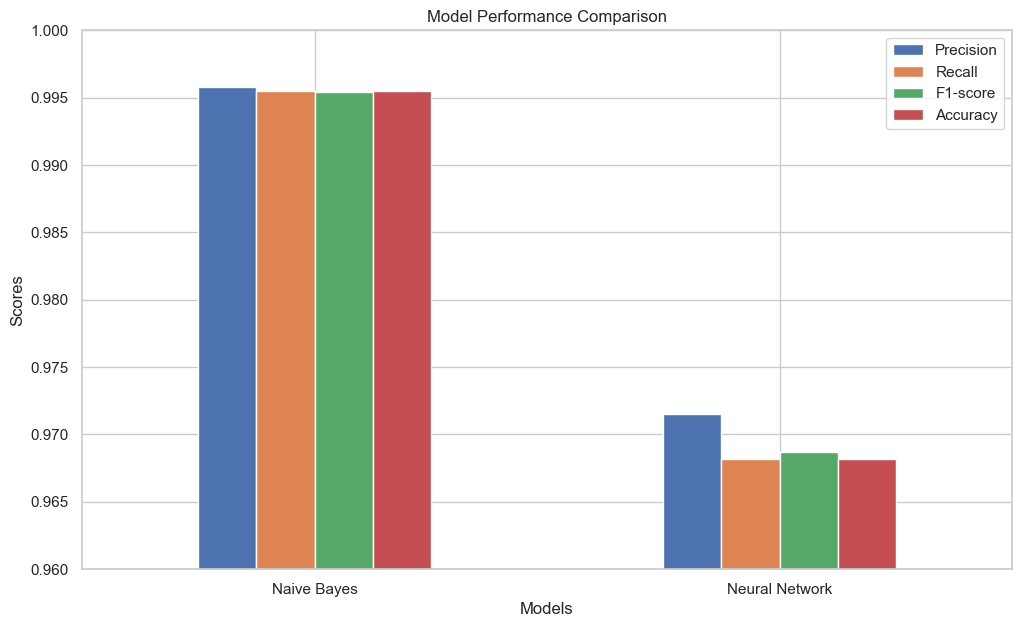

In [40]:
import matplotlib.pyplot as plt
import pandas as pd

# Data
models = ['Naive Bayes', 'Neural Network']
precision = [0.9958, 0.9715, ]
recall = [0.9955, 0.9682]
f1_score = [0.9954,0.9687]
accuracy = [0.9955, 0.9682]

# Creating DataFrame
df = pd.DataFrame({'Precision': precision, 'Recall': recall, 'F1-score': f1_score, 'Accuracy': accuracy}, index=models)

# Plotting
ax = df.plot(kind='bar', figsize=(12, 7))  
ax.set_title('Model Performance Comparison')
ax.set_ylabel('Scores')
ax.set_xlabel('Models')
plt.xticks(rotation=0)
plt.grid(True)

# Adjusting y-axis scale to better visualize differences
ax.set_ylim(0.96, 1.0) 

plt.show()


Explanation and Interpretation of Model Performance
Precision: Precision is the ratio of correctly predicted positive observations to the total predicted positives. High precision indicates a low false positive rate. Naive Bayes has the highest precision, suggesting it's best at correctly identifying crops without labeling many incorrectly.

Recall: Recall (Sensitivity) is the ratio of correctly predicted positive observations to all observations in the actual class. Naive Bayes again scores highest, indicating it is most capable of finding all relevant cases (all suitable crop types).

F1-score: The F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. The highest F1-score of Naive Bayes implies a balance between precision and recall.

Accuracy: This is the ratio of correctly predicted observation to the total observations. Naive Bayes has the highest accuracy, indicating it correctly identifies crop types most often.

STRENGTHS, WEAKNESS & IMPROVEMENTS
Model Performance Analysis for Crop Recommendation
The performance of various machine learning models on the crop recommendation project has been visualized in the bar chart, showing precision, recall, F1-score, and accuracy. Let's dive into a detailed analysis of each model's strengths, weaknesses, and potential improvements, and conclude with why Naive Bayes is outperforming the others.

Naive Bayes
Strengths: Naive Bayes is simple, fast, and performs exceptionally well when the assumption of feature independence holds. It's particularly effective in high-dimensional spaces, which might be the case with our crop dataset.
Weaknesses: The assumption of feature independence rarely holds true in real-world data, which can limit its performance in some scenarios. Naive Bayes also struggles with zero-frequency problems where it assigns zero probability to unseen features/labels combinations.
Improvements: Applying smoothing techniques like Laplace estimation can help with zero-frequency problems. Feature engineering to reduce dependency among variables can also improve performance.
Neural Network
Strengths: Neural Networks are highly flexible and can model complex non-linear relationships, making them suitable for the diverse and complex data typically found in crop recommendation datasets.
Weaknesses: They require a large amount of data to train and are not as interpretable as simpler models. They can also overfit if not properly regularized.
Improvements: Using dropout, regularization techniques, and proper validation strategies can help prevent overfitting. Neural architecture search can optimize the network structure.
Why Might Naive Bayes Perform Better?
The high performance of Naive Bayes suggests that the dataset likely has features that are relatively independent, a condition where Naive Bayes thrives. Its simplicity also helps to avoid overfitting, a problem that more complex models can sometimes face. Additionally, if the data has many categorical features or features following a probability distribution that Naive Bayes assumes, it can outperform other models.

Analysis of Lower Scores in Other Models
For Neural Networks, the lower score might be due to overfitting, insufficient training, or a need for more data.
Decision Trees and XGBoost may have been too complex for the dataset, leading to overfitting despite their capability to handle complex patterns.
Random Forest's lower performance compared to Naive Bayes might be due to its ensemble nature, where the randomness didn't align well with the dataset patterns as much as the probabilistic approach of Naive Bayes.
CONCLUSION
Comprehensive Conclusion on Model Selection for Crop Recommendation
The performance of various models in the crop recommendation project brings to light some valuable insights. Naive Bayes has demonstrated superior performance in this specific context, which underscores the fundamental principle of tailoring the model choice to fit the dataset's inherent characteristics. The simplicity and efficiency of Naive Bayes, particularly when dealing with features that are independent, render it highly suitable for certain crop recommendation tasks, especially with datasets that are small or exhibit some imbalance.


Nonetheless, the reliance on Naive Bayes should be cautiously approached, particularly with more complex datasets or when the assumption of feature independence does not hold true. In contrast, models like Decision Trees and Random Forests, known for their capability to decipher complex feature-target relationships, may fall into the trap of overfitting, especially when not regulated by proper pruning techniques or when faced with very large datasets that can lead to increased computational overhead.


State-of-the-art techniques such as Neural Networks and XGBoost stand out for their impressive performance across a variety of machine learning tasks. They offer significant power in handling crop recommendation challenges but come with the caveat of needing extensive training data and careful hyperparameter tuning to reach their full potential.


Ultimately, the ideal model for a crop recommendation project is contingent upon the dataset's unique properties and the sought-after balance between predictive performance and model transparency. Cross-validation remains a critical step in this process, ensuring that the model's effectiveness generalizes well to unseen data. For smaller or imbalanced datasets, Naive Bayes emerges as a robust contender. Conversely, for larger and more intricate datasets, embracing the complexity of models like Decision Trees, Random Forests, Neural Networks, or XGBoost may yield more fruitful results, provided that the intricacies of model tuning are navigated with expertise.